In [1]:
import pandas as pd


# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)


# # load make_blobs to simulate data
# from sklearn.datasets import make_blobs
# from sklearn.datasets import make_classification
# from sklearn.datasets import make_regression

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


# For text processing
import re
import nltk
from nltk.corpus import stopwords
# from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
texts = ['His smile was not perfect smile smile sang sang smile smile ', 
         'His smile was not not not not perfect sang sang smile smile smile smile ', 
         'she not sang sang sang sang '
        ]

In [3]:
# default 
# - n-grams = 1
# - stopwords filterations : false
# - lowercase : yes

# instantiate the vectorizer
vect_tfidf = TfidfVectorizer(analyzer='word')

In [5]:
# train (Bow) 
vect_tfidf.fit(texts)
print(vect_tfidf.get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': None, 'strip_accents': None, 'sublinear_tf': False, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}


In [6]:
# get all the feature/token names
print("Vocabulary size: {}".format(len(vect_tfidf.vocabulary_)))


Vocabulary size: 7


In [7]:
feature_names = vect_tfidf.get_feature_names()
print(feature_names)


['his', 'not', 'perfect', 'sang', 'she', 'smile', 'was']


In [8]:
print("Vocabulary content:\n {}".format(vect_tfidf.vocabulary_))

Vocabulary content:
 {'his': 0, 'smile': 5, 'was': 6, 'not': 1, 'perfect': 2, 'sang': 3, 'she': 4}


In [9]:
# prepare dtm
X_train_tfidf_dtm = vect_tfidf.transform(texts)

In [10]:
print(type(X_train_tfidf_dtm)) #Sparse matrix has been created


<class 'scipy.sparse.csr.csr_matrix'>


In [11]:
print(X_train_tfidf_dtm.toarray())

[[0.17956055 0.13944479 0.17956055 0.27888957 0.         0.89780275
  0.17956055]
 [0.15799185 0.49077906 0.15799185 0.24538953 0.         0.78995925
  0.15799185]
 [0.         0.22435545 0.         0.89742178 0.37986679 0.
  0.        ]]


In [12]:
print(X_train_tfidf_dtm.toarray()[0]) # Dimension of & as we had total n umber of words = 7

[0.17956055 0.13944479 0.17956055 0.27888957 0.         0.89780275
 0.17956055]


In [ ]:
# Creating the Tfidf Vectorizer score dataframe

In [13]:
# create a dataframe
pd.DataFrame(X_train_tfidf_dtm.toarray(), columns=feature_names)

,his,not,perfect,sang,she,smile,was
0,0.179561,0.139445,0.179561,0.278890,0.000000,0.897803,0.179561
1,0.157992,0.490779,0.157992,0.245390,0.000000,0.789959,0.157992
2,0.000000,0.224355,0.000000,0.897422,0.379867,0.000000,0.000000


In [10]:
# IDF: The inverse document frequency

In [14]:
idf = vect_tfidf.idf_

In [15]:
idf

array([1.28768207, 1.        , 1.28768207, 1.        , 1.69314718,
       1.28768207, 1.28768207])

In [17]:
X_train_with_idf = dict(zip(vect_tfidf.get_feature_names(), idf))

In [18]:
X_train_with_idf

{'his': 1.2876820724517808,
 'not': 1.0,
 'perfect': 1.2876820724517808,
 'sang': 1.0,
 'she': 1.6931471805599454,
 'smile': 1.2876820724517808,
 'was': 1.2876820724517808}

In [30]:
# We see that the tokens 'sang','she' have the most idf weight because they are the only 
# tokens that appear in one document only.

# The token 'not' appears 6 times but it is also in all documents, so its idf is the lowest

In [19]:
X_train_with_idf.items()

dict_items([('his', 1.2876820724517808), ('not', 1.0), ('perfect', 1.2876820724517808), ('sang', 1.0), ('she', 1.6931471805599454), ('smile', 1.2876820724517808), ('was', 1.2876820724517808)])

In [20]:
sorted(X_train_with_idf.items(), key = lambda x : x[1])

[('not', 1.0),
 ('sang', 1.0),
 ('his', 1.2876820724517808),
 ('perfect', 1.2876820724517808),
 ('smile', 1.2876820724517808),
 ('was', 1.2876820724517808),
 ('she', 1.6931471805599454)]

In [21]:
# Graphing inverse document frequency

df_X_idf = pd.DataFrame.from_dict(X_train_with_idf, orient='index').reset_index()
df_X_idf.columns=('token','weight')

df_X_idf = df_X_idf.sort_values(by='weight', ascending=False)
df_X_idf 

# Most common words have lower weights by the process of idf

,token,weight
4,she,1.693147
0,his,1.287682
2,perfect,1.287682
5,smile,1.287682
6,was,1.287682
1,not,1.000000
3,sang,1.000000


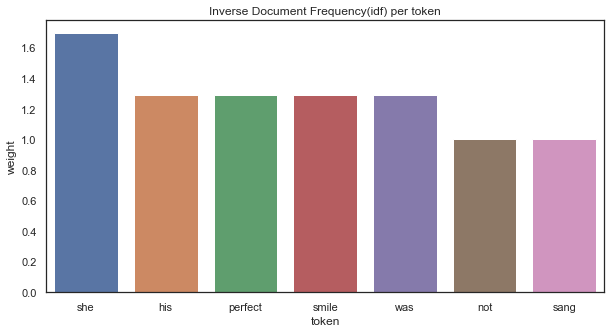

In [22]:
sns.barplot(x='token', y='weight', data=df_X_idf)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)

In [ ]:
# Summary: the more times a token appears in a document, the more weight it will 
# have. 

# However, the more documents the token appears in, it is 'penalized' and 
# the weight is diminished. 

# For example, the weight for token 'not' is 4, but if 
# it did not appear in all documents (that is, only in one document) its weight 
# would have been 8.3